In [192]:
import requests      # For talking to the Internet
import json          # For JSON parsing
import datetime      # For date calculations
import time          # For sleeping
import pandas as pd  # For data analysis
import nltk          # For text analysis

In [177]:
# In a separate file, I just wrote: 
# nytAPIkey = xxxxx
# where xxxxx is my API key that I got from NYT
from secrets import nytAPIkey

In [178]:
baseUrl = "https://api.nytimes.com/svc/books/v3/lists/2019-06-09/combined-print-and-e-book-fiction.json"

In [179]:
params = {"api-key": nytAPIkey} 

In [180]:
response = requests.get(baseUrl, params=params)

In [181]:
response.reason

'OK'

In [182]:
parsed = json.loads(response.text)
parsed.keys()

dict_keys(['status', 'copyright', 'num_results', 'last_modified', 'results'])

In [183]:
parsed['num_results']

15

In [184]:
[book['description'] for book in parsed['results']['books']]

['In a quiet town on the North Carolina coast in 1969, a young woman who survived alone in the marsh becomes a murder suspect.',
 'In the frozen wastes to the north of Winterfell, sinister and supernatural forces are mustering. Basis of the HBO series.',
 "The 18th book in the Women's Murder Club series. Lindsay Boxer investigates the disappearance of three female teachers.",
 'Hans-Peter Schneider pauses his ghastly deeds to seek a dead man’s gold hidden under a Miami mansion, but its caretaker’s surprising skills prove daunting.',
 'Jack Reacher explores the New England town where his father was born and a Canadian couple now find themselves stranded.',
 'The fifth book in the Memory Man series. The first man Amos Decker put behind bars asks to have his name cleared.',
 'A South Carolina lawyer learns about the questionable practices of a Tennessee orphanage.',
 'Drue Campbell inherits a run-down beach bungalow and takes a job at her estranged father’s personal injury attorney office

In [185]:
def getListByDate(date):
    baseUrl = "https://api.nytimes.com/svc/books/v3/lists/%s/combined-print-and-e-book-fiction.json" % date
    response = requests.get(baseUrl, params=params)
    if response.ok:
        parsed = json.loads(response.text)
        return [book['description'] for book in parsed['results']['books']]
    else: 
        return None

In [ ]:
descriptions = {}

In [274]:
startDate = datetime.date(2019,6,2)
for i in range(600): 
    print(i, end=' ')
    startDate = startDate - datetime.timedelta(days=7)
    descrips = getListByDate(startDate)
    descriptions[startDate] = descrips
    time.sleep(1)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

KeyboardInterrupt: 

In [282]:
counts = []
for date, descs in descriptions.items():
    if descs is not None and len(descs) > 0:
        allDescs = ' '.join(descs)
        tokens = nltk.word_tokenize(allDescs)
        dist = nltk.FreqDist(tokens)
        counts.append((date, dist))

In [283]:
def countWord(word):
    return pd.Series([count[1][word] for count in counts], index=[count[0].isoformat() for count in counts])

In [284]:
df = pd.DataFrame({word: countWord(word) for word in ['man', 'woman', 'child', 'murder', 'love', 'spy']})

In [285]:
df

,man,woman,child,murder,love,spy
2019-05-26,3,1,0,1,1,0
2019-05-19,2,1,0,1,1,0
2019-05-12,1,2,0,1,1,0
2019-05-05,1,1,0,1,1,0
2019-04-28,1,1,0,1,1,0
2019-04-21,1,2,0,1,1,0
2019-04-14,1,1,0,2,1,0
2019-04-07,0,2,1,1,1,0
2019-03-31,0,2,1,1,1,0
2019-03-24,0,1,1,2,1,0


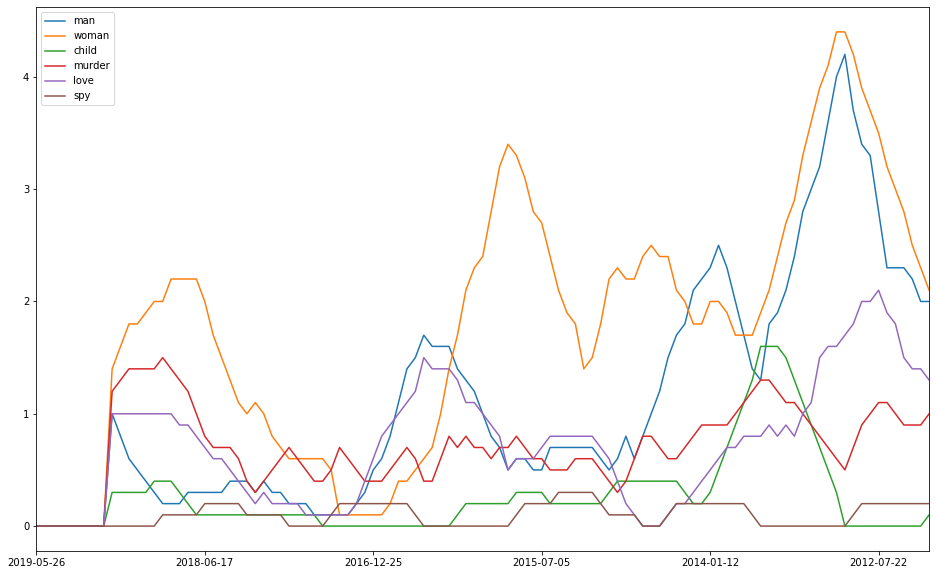

In [286]:
df.rolling(window=10).mean().fillna(0).plot(figsize=(16,10))